## Linear Regression with Scikit-Learn

https://scikit-learn.org/stable/modules/linear_model.html

*Linear Models* refers to best possible representation of data by linear or multilinear
functions. In the simplest version we start with a collection of ordered pairs:
    
$(x_i, y_i)$, $i = 1 ... n$
    
If these points lie on a line, $y = mx + b$, so $y_i = mx_i + b$ for all *i*, the data is perfectly correlated and there is nothing to do. Of course, most data is not so well correlated.

In this case, the first attempt to model or represent the data is to find coeffiecients
*m* and *b*, so that the collection of $y_i$ are pairwise as close to $\hat{y}_i = mx_i + b$
as possible. This means that 

$\sum_i (y_i - \hat{y}_i)^2 = \sum_i (y_i - (mx_i + b))^2$

should be minimized. Since the $x_i$ and $y_i$ are known, we are trying to minimize
this sum as a function of $m$ and $b$. It follows that this is a minimization problem in multivariable calculus. Compute the gradient of this function and solve
for the values of $m$ and $b$ that make entries of the gradient 0. 

More generally, we might have $k$ independent variables, so that ${\bf x} = (x_1,\ldots,x_k)$, and we look for coefficients $m_1, \ldots, m_p$ so that 

$\sum_i (y_i - (b + m_1 x_{i1} + \cdots + m_k x_{ik}))^2$

is minimized. This is often rewritten 

Here, we'll rely on scikit-learn to do the solving!

We'll start with an example from scikit-learn written by Jaques Grobler.
In addition to importing the various packages, we'll import a diabetes
data set
from scikit-learn.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

The information from scikit-learn on the Diabetes data set can be found here:

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

The following is directly from scikit-learn:

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

* Number of Instances: 442
* Number of Attributes: First 10 columns are numeric predictive values
* Target: Column 11 is a quantitative measure of disease progression one year after baseline
    
Attribute Information:

* age: age in years
* sex
* bmi: body mass index
* bp: average blood pressure
* s1 tc: total serum cholesterol
* s2 ldl: low-density lipoproteins
* s3 hdl: high-density lipoproteins
* s4 tch: total cholesterol / HDL
* s5 ltg: possibly log of serum triglycerides level
* s6 glu: blood sugar level

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1).

Load the diabetes data set and select one of the first 10 columns to analyze
using the quantitative measure of disease progression as the dependent variable.

In [2]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

type(diabetes_X), diabetes_X.shape, type(diabetes_y), diabetes_y.shape

(numpy.ndarray, (442, 10), numpy.ndarray, (442,))

Let's peek at the first three rows and five columns of the data, and then of the
BMI columnm:

In [3]:
diabetes_X[:3,:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945]])

In [13]:
diabetes_bmi = diabetes_X[:, np.newaxis, 2]
diabetes_bmi[:3]

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121]])

Next split the data set into a large training set and a smaller test set:

In [14]:
diabetes_bmi_train = diabetes_bmi[:-20]
diabetes_bmi_test = diabetes_bmi[-20:]


diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

Note:

In [15]:
diabetes_bmi_train.shape, diabetes_bmi_test.shape

((422, 1), (20, 1))

First, create the linear regression object:

In [16]:
regr = linear_model.LinearRegression()

Train the model using the training sets:

In [17]:
regr.fit(diabetes_bmi_train, diabetes_y_train)

LinearRegression()

Make predictions using the testing set then show the
computed values and statistics:

In [18]:
diabetes_y_pred = regr.predict(diabetes_bmi_test)

print("Coefficients: \n", regr.coef_)

print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07


The coefficient of determination: 1 is perfect prediction

In [19]:
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficient of determination: 0.47


The following will plot the best fit or regression line and the training data.
Notice the football shape of the data cloud. This is an intuitive indication
that it is reasonable to model the data by a regression line.

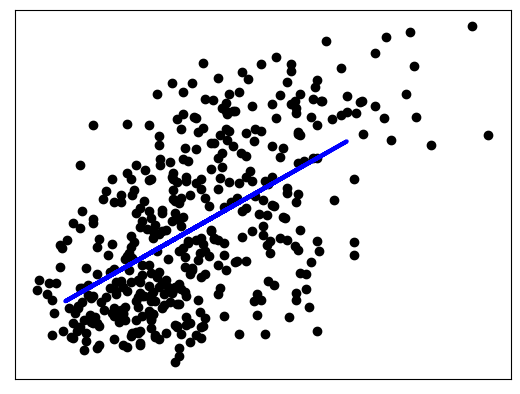

In [20]:
# Plot training data
plt.scatter(diabetes_bmi_train, diabetes_y_train, color="black")
plt.plot(diabetes_bmi_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

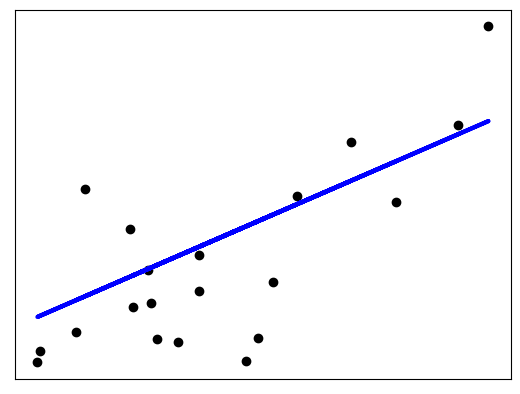

In [21]:
# Plot test data
plt.scatter(diabetes_bmi_test, diabetes_y_test, color="black")
plt.plot(diabetes_bmi_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Exercises

1. Repeat the above for the rest of the columns of $X$. Which data columns
are the best predictors of diabetes?

### Blood Pressure (bp)

In [23]:
diabetes_bp = diabetes_X[:, np.newaxis, 3]
diabetes_bp[:3]

array([[ 0.02187239],
       [-0.02632753],
       [-0.00567042]])

Next split the data set into a large training set and a smaller test set:

In [24]:
diabetes_bp_train = diabetes_bp[:-20]
diabetes_bp_test = diabetes_bp[-20:]


diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

First, create the linear regression object:

In [25]:
regr = linear_model.LinearRegression()

Train the model using the training sets:

In [26]:
regr.fit(diabetes_bp_train, diabetes_y_train)

LinearRegression()

Make predictions using the testing set then show the
computed values and statistics:

In [27]:
diabetes_y_pred = regr.predict(diabetes_bp_test)

print("Coefficients: \n", regr.coef_)

print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [709.19048713]
Mean squared error: 4058.40


The coefficient of determination: 1 is perfect prediction

In [28]:
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficient of determination: 0.16


The following will plot the best fit or regression line and the training data.
Notice the football shape of the data cloud. This is an intuitive indication
that it is reasonable to model the data by a regression line.

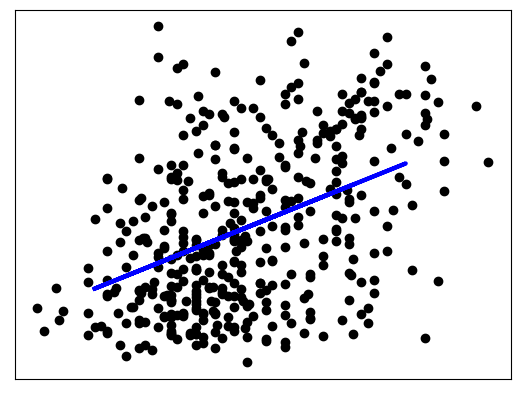

In [29]:
# Plot training data
plt.scatter(diabetes_bp_train, diabetes_y_train, color="black")
plt.plot(diabetes_bp_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

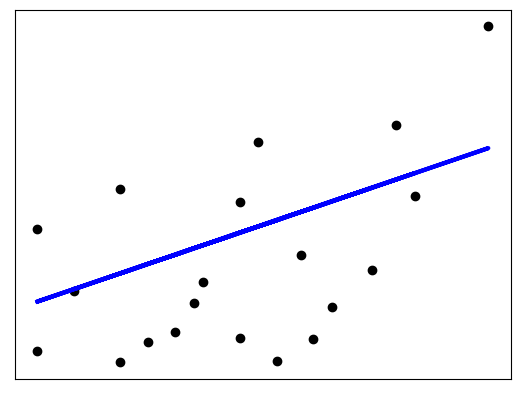

In [30]:
# Plot test data
plt.scatter(diabetes_bp_test, diabetes_y_test, color="black")
plt.plot(diabetes_bp_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Total Serum Cholesterol (tc)

In [31]:
diabetes_tc = diabetes_X[:, np.newaxis, 4]
diabetes_tc[:3]

array([[-0.0442235 ],
       [-0.00844872],
       [-0.04559945]])

Next split the data set into a large training set and a smaller test set:

In [32]:
diabetes_tc_train = diabetes_tc[:-20]
diabetes_tc_test = diabetes_tc[-20:]


diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

First, create the linear regression object:

In [33]:
regr = linear_model.LinearRegression()

Train the model using the training sets:

In [34]:
regr.fit(diabetes_tc_train, diabetes_y_train)

LinearRegression()

Make predictions using the testing set then show the
computed values and statistics:

In [35]:
diabetes_y_pred = regr.predict(diabetes_tc_test)

print("Coefficients: \n", regr.coef_)

print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [352.82770178]
Mean squared error: 5608.70


The coefficient of determination: 1 is perfect prediction

In [36]:
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficient of determination: -0.16


The following will plot the best fit or regression line and the training data.
Notice the football shape of the data cloud. This is an intuitive indication
that it is reasonable to model the data by a regression line.

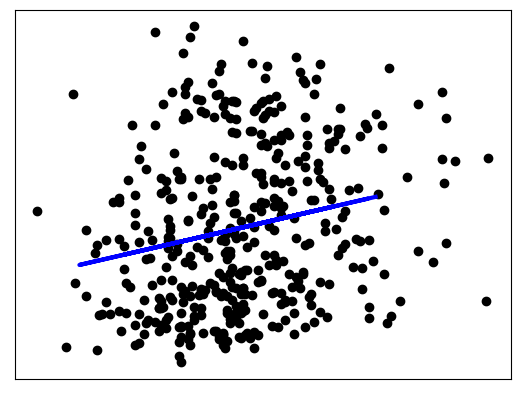

In [37]:
# Plot training data
plt.scatter(diabetes_tc_train, diabetes_y_train, color="black")
plt.plot(diabetes_tc_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

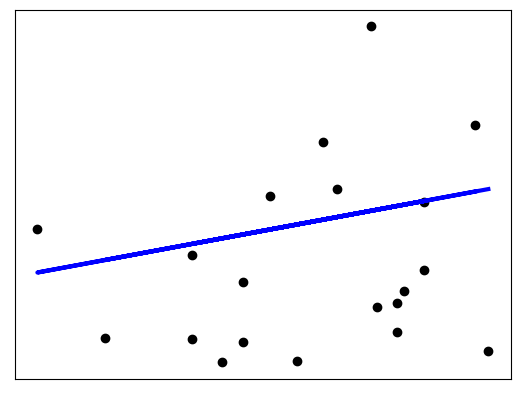

In [38]:
# Plot test data
plt.scatter(diabetes_tc_test, diabetes_y_test, color="black")
plt.plot(diabetes_tc_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Blood Sugar Level (glu)

In [39]:
diabetes_glu = diabetes_X[:, np.newaxis, 9]
diabetes_glu[:3]

array([[-0.01764613],
       [-0.09220405],
       [-0.02593034]])

Next split the data set into a large training set and a smaller test set:

In [40]:
diabetes_glu_train = diabetes_glu[:-20]
diabetes_glu_test = diabetes_glu[-20:]


diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

First, create the linear regression object:

In [41]:
regr = linear_model.LinearRegression()

Train the model using the training sets:

In [42]:
regr.fit(diabetes_glu_train, diabetes_y_train)

LinearRegression()

Make predictions using the testing set then show the
computed values and statistics:

In [43]:
diabetes_y_pred = regr.predict(diabetes_glu_test)

print("Coefficients: \n", regr.coef_)

print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [630.53662695]
Mean squared error: 5265.50


The coefficient of determination: 1 is perfect prediction

In [44]:
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficient of determination: -0.09


The following will plot the best fit or regression line and the training data.
Notice the football shape of the data cloud. This is an intuitive indication
that it is reasonable to model the data by a regression line.

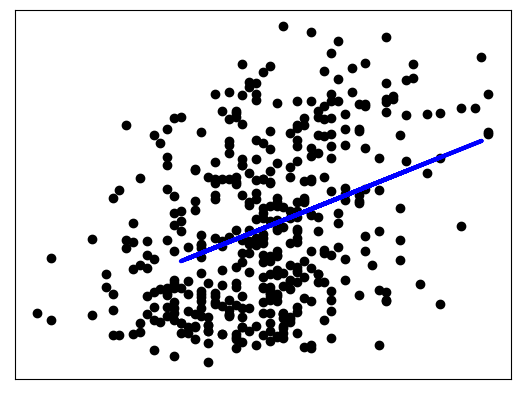

In [45]:
# Plot training data
plt.scatter(diabetes_glu_train, diabetes_y_train, color="black")
plt.plot(diabetes_glu_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

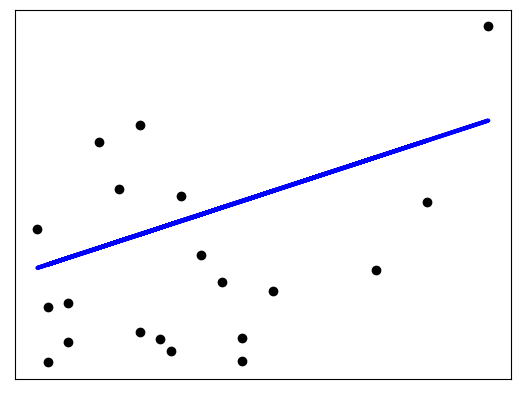

In [46]:
# Plot test data
plt.scatter(diabetes_glu_test, diabetes_y_test, color="black")
plt.plot(diabetes_glu_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Of the variables tested, the Body Mass Index (BMI) proved to be the best predictor. All other variables tested led to greater sums of square errors (SSEs) and smaller abosulte values of the correlation coeffificent (R$^2$) than those of BMI. 

2. Apply linear regression to the iris data set. Color code the 
scatter plot according to the iris labels. One wold expect sepal
length and width and petal length and width to be highly correlated.

    Is this the case?

In [48]:
import pandas as pd

In [54]:
## Read in Data with Specified Column Names
path = "iris.data.csv"

iris_df = pd.read_csv(path, names = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Species"])

In [56]:
## Create np.arrays for Analysis
sepal_length_array = np.array(iris_df["Sepal Length"])
sepal_width_array = np.array(iris_df["Sepal Width"])

petal_length_array = np.array(iris_df["Petal Length"])
petal_width_array = np.array(iris_df["Petal Width"])

sepal_array = np.array(iris_df[iris_df.columns[0:2]])
petal_array = np.array(iris_df[iris_df.columns[2:4]])

length_array = np.array(iris_df[["Sepal Length","Petal Length"]])
width_array = np.array(iris_df[["Sepal Width","Petal Width"]])

species = sepal_length_array = np.array(iris_df["Species"])

species_color = np.zeros(150,dtype = int)

species_color[species == 'Iris-setosa'] = 0
species_color[species == 'Iris-versicolor'] = 1
species_color[species == 'Iris-virginica'] =  2

### Regression with Length (x) and Width (y) [(i) = Sepal, (ii) = Petal]

#### (i)

Split the data set into a large training set and a smaller test set:

In [59]:
iris_sepal_length_train = sepal_length_array[:-20]
iris_sepal_length_test = sepal_length_array[-20:]


iris_sepal_width_train = sepal_width_array[:-20]
iris_sepal_width_test = sepal_width_array[-20:]

First, create the linear regression object:

In [60]:
regr = linear_model.LinearRegression()

Train the model using the training sets:

In [61]:
regr.fit(iris_sepal_length_train, iris_sepal_width_train)

ValueError: could not convert string to float: 'Iris-setosa'

Make predictions using the testing set then show the
computed values and statistics:

In [43]:
iris_sepal_width_pred = regr.predict(iris_sepal_length_test)

print("Coefficients: \n", regr.coef_)

print("Mean squared error: %.2f" % mean_squared_error(iris_sepal_width_test, iris_sepal_width_pred))

Coefficients: 
 [630.53662695]
Mean squared error: 5265.50


The coefficient of determination: 1 is perfect prediction

In [44]:
print("Coefficient of determination: %.2f" % r2_score(iris_sepal_width_test, iris_sepal_width_pred))

Coefficient of determination: -0.09


The following will plot the best fit or regression line and the training data.
Notice the football shape of the data cloud. This is an intuitive indication
that it is reasonable to model the data by a regression line.

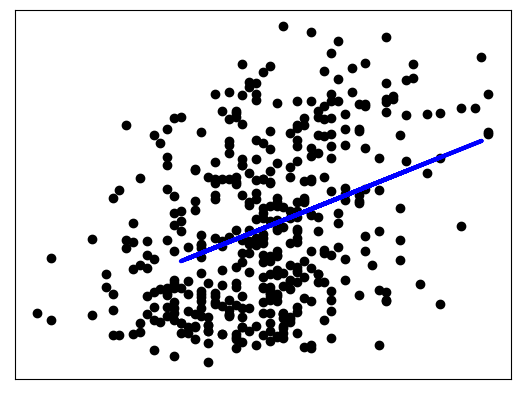

In [45]:
# Plot training data
plt.scatter(iris_sepal_length_train, iris_sepal_width_train, color="black")
plt.plot(iris_sepal_length_test, iris_sepal_width_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

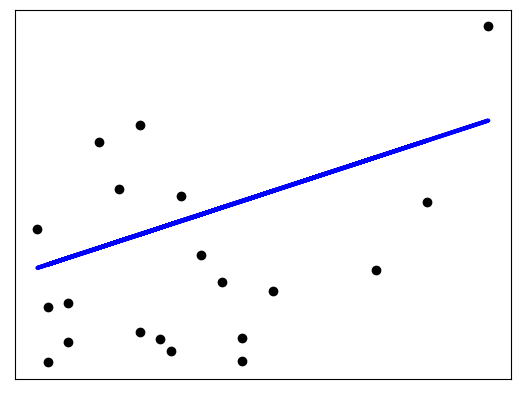

In [46]:
# Plot test data
plt.scatter(iris_sepal_length_test, iris_sepal_width_test, color="black")
plt.plot(iris_sepal_length_test, iris_sepal_width_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

#### (ii)

In [39]:
diabetes_glu = diabetes_X[:, np.newaxis, 9]
diabetes_glu[:3]

array([[-0.01764613],
       [-0.09220405],
       [-0.02593034]])

Next split the data set into a large training set and a smaller test set:

In [40]:
diabetes_glu_train = diabetes_glu[:-20]
diabetes_glu_test = diabetes_glu[-20:]


diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

First, create the linear regression object:

In [41]:
regr = linear_model.LinearRegression()

Train the model using the training sets:

In [42]:
regr.fit(diabetes_glu_train, diabetes_y_train)

LinearRegression()

Make predictions using the testing set then show the
computed values and statistics:

In [43]:
diabetes_y_pred = regr.predict(diabetes_glu_test)

print("Coefficients: \n", regr.coef_)

print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [630.53662695]
Mean squared error: 5265.50


The coefficient of determination: 1 is perfect prediction

In [44]:
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficient of determination: -0.09


The following will plot the best fit or regression line and the training data.
Notice the football shape of the data cloud. This is an intuitive indication
that it is reasonable to model the data by a regression line.

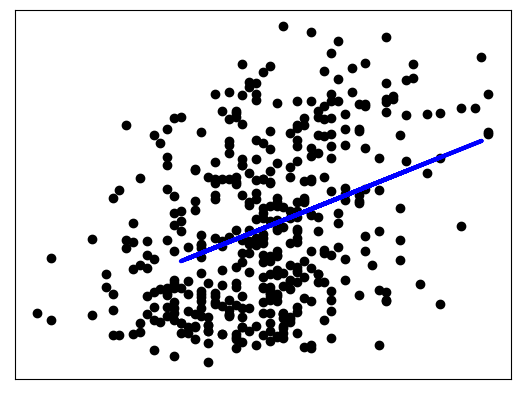

In [45]:
# Plot training data
plt.scatter(diabetes_glu_train, diabetes_y_train, color="black")
plt.plot(diabetes_glu_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

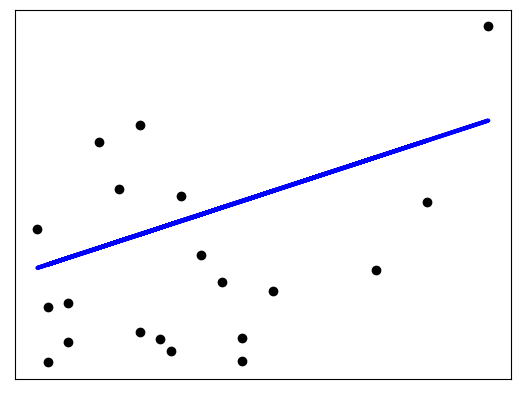

In [46]:
# Plot test data
plt.scatter(diabetes_glu_test, diabetes_y_test, color="black")
plt.plot(diabetes_glu_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

3. Apply linear regression to select columns (you select) of the state 
education data. This can be downloaded from Canvas. It is in the .csv
file 'state_edu_data.csv'

Color code the scatter plot by region of the country. 

Are the correlations expected? Are there any surprises?

If the .csv file is in your course folder, you can use:
 
path = 'state_edu_data.csv'
edu_by_state = pd.read_csv(path)

path = 'state_edu_data.csv'
edu_by_state = pd.read_csv(path)

In [ ]:
edu_by_state 

In [ ]:
edu_by_state

In [ ]:
path = 'state_edu_data.csv'
edu_by_state.to_csv(path, sep = ',',na_rep='')